In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import statistics  as sts
import sys
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
data = pd.read_csv('Covid Live.csv')
data.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


### Se han encontrado números con un formato de comas, lo cual puede procar complicaciones a la hora de analizar los datos. Se procede a normalizar todos los datos numericos con este formato a uno de tipo flotante

In [25]:
data.columns
data.columns = ['Id', 'Country', 'TotalCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'SeriousCritical',
       'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',
       'Tests1Mpop', 'Population']
data = data.set_index('Id')

In [26]:
data.dtypes
col = data.select_dtypes(include = "object").columns
col = col[ col != 'Country']
col

Index(['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',
       'Tests1Mpop', 'Population'],
      dtype='object')

In [27]:
data['TotalCases'] = data['TotalCases'].str.replace(",", "").astype(float)
data['SeriousCritical'] = data['SeriousCritical'].str.replace(",", "").astype(float)
data['Tests1Mpop'] = data['Tests1Mpop'].str.replace(",", "").astype(float)
data[ 'TotalDeaths'] = data[ 'TotalDeaths'].str.replace(",", "").astype(float)
data[ 'TotCases1Mpop'] = data[ 'TotCases1Mpop'].str.replace(",", "").astype(float)
data[ 'Population'] = data[ 'Population'].str.replace(",", "").astype(float)
data[ 'TotalRecovered'] = data[ 'TotalRecovered'].str.replace(",", "").astype(float)
data[ 'Deaths1Mpop'] = data[ 'Deaths1Mpop'].str.replace(",", "").astype(float)
data[ 'ActiveCases'] = data[ 'ActiveCases'].str.replace(",", "").astype(float)
data[ 'TotalTests'] = data[ 'TotalTests'].str.replace(",", "").astype(float)

In [28]:
data.head()

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,98166904.0,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,44587307.0,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,35342950.0,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,34706757.0,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,33312373.0,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


### He encontrado una perdida de datos en distintas celdas, se realiza una media de los datos de dichas columnas para llenar espacios vacios

In [29]:
data.isnull().sum()

Country              0
TotalCases           0
TotalDeaths          5
NewDeaths          227
TotalRecovered      16
ActiveCases         15
SeriousCritical     83
TotCases1Mpop        2
Deaths1Mpop          7
TotalTests          16
Tests1Mpop          16
Population           2
dtype: int64

In [30]:
data['NewDeaths'].fillna(0, inplace=True)
data['TotalDeaths'].fillna(sts.mean(data['TotalDeaths'].dropna()), inplace=True)
data['TotalRecovered'].fillna(sts.mean(data['TotalRecovered'].dropna()), inplace=True)
data['ActiveCases'].fillna(sts.mean(data['ActiveCases'].dropna()), inplace=True)
data['SeriousCritical'].fillna(sts.mean(data['SeriousCritical'].dropna()), inplace=True)
data['TotCases1Mpop'].fillna(sts.mean(data['TotCases1Mpop'].dropna()), inplace=True)
data['Deaths1Mpop'].fillna(sts.mean(data['Deaths1Mpop'].dropna()), inplace=True)
data['TotalTests'].fillna(sts.mean(data['TotalTests'].dropna()), inplace=True)
data['Tests1Mpop'].fillna(sts.mean(data['Tests1Mpop'].dropna()), inplace=True)
data['Population'].fillna(sts.mean(data['Population'].dropna()), inplace=True)

data.isnull().sum()

Country            0
TotalCases         0
TotalDeaths        0
NewDeaths          0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
TotCases1Mpop      0
Deaths1Mpop        0
TotalTests         0
Tests1Mpop         0
Population         0
dtype: int64

In [31]:
data.describe()

,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.909820e+04,0.234783,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,8.779899e+06,1.010917e+05,2.835614,8.501757e+06,2.004752e+05,736.746974,181574.374660,1227.784889,1.103852e+08,3.366370e+06,1.383153e+08
min,9.000000e+00,1.000000e+00,0.000000,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.160000e+02,0.000000,2.449950e+04,1.700000e+02,10.000000,17017.500000,174.250000,4.007550e+05,1.968250e+05,5.476582e+05
50%,2.037110e+05,2.454000e+03,0.000000,3.248420e+05,2.192000e+03,122.500000,120642.500000,827.500000,2.681464e+06,1.061616e+06,5.889248e+06
75%,1.256286e+06,1.624250e+04,0.000000,2.399912e+06,3.082250e+04,270.224490,292559.750000,1896.750000,2.071086e+07,2.072495e+06,2.546516e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


## Se busca relaciones entre los datos

<AxesSubplot:xlabel='Deaths1Mpop', ylabel='TotCases1Mpop'>

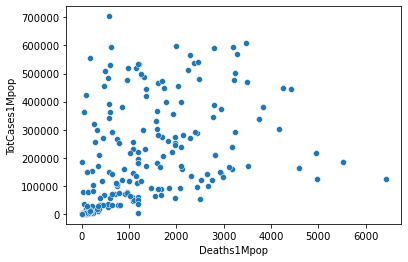

In [33]:
#'Country', 'TotalCases', 'TotalDeaths', 'NewDeaths','TotalRecovered', 'ActiveCases', 'SeriousCritical','TotCases1Mpop', 'Deaths1Mpop', 'TotalTests','Tests1Mpop', 'Population'

sns.scatterplot(x="Deaths1Mpop",y="TotCases1Mpop",data=data)

<AxesSubplot:xlabel='TotCases1Mpop', ylabel='SeriousCritical'>

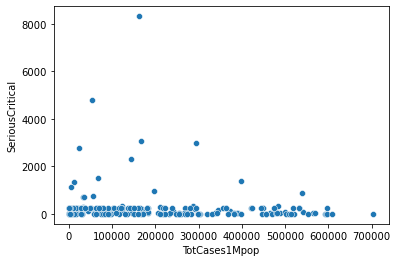

In [34]:
sns.scatterplot(x="TotCases1Mpop",y="SeriousCritical",data=data)

### Para tener una mejor visibilidad de esta relación, ajustaré la variable de casos totales por 1 millón de habitantes. Al crear una variable categórica, puede ser útil un diagrama de barras y un diagrama de caja.

In [35]:
data['CasesGroup']=pd.cut(
   data['TotCases1Mpop'],
   bins=[100000, 200000, 300000, 400000, 500000, 600000, 700000, sys.maxsize],
   labels=['<100K' , '< 200K' , '< 300K' , '< 400K' , '< 500K' , '< 600K' , '< 700K']
)

<AxesSubplot:xlabel='CasesGroup', ylabel='SeriousCritical'>

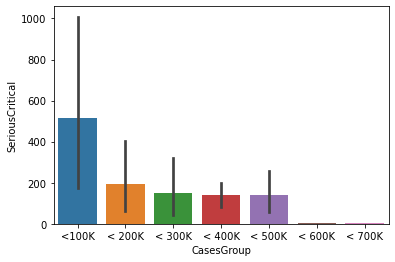

In [37]:
sns.barplot(x = "CasesGroup",y = "SeriousCritical", data = data)

<AxesSubplot:xlabel='CasesGroup', ylabel='SeriousCritical'>

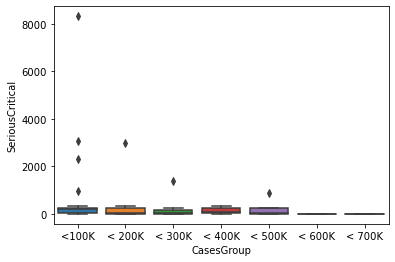

In [38]:
sns.boxplot(x = "CasesGroup",y = "SeriousCritical", data = data)

### La visibilidad no está bien, así que eliminaré los valores atípicos

In [39]:
def removeoutlier(values):
    fator = 1.5
    q3, q1 = np.percentile(values, [75, 25])
    iqr = q3 - q1
    lowpass = q1 - (iqr * fator)
    highpass = q3 + (iqr * fator)
    return [v for v in values if v > lowpass and v < highpass]
nooutlier = removeoutlier(data['SeriousCritical'])
dataaux = data[data.SeriousCritical.isin(nooutlier)]

<AxesSubplot:xlabel='CasesGroup', ylabel='SeriousCritical'>

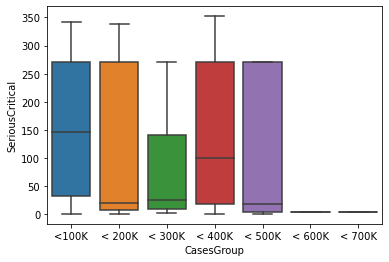

In [40]:
#distribución normal estándar, caja (rango intercuartílico), 
sns.boxplot(x = "CasesGroup",y = "SeriousCritical", data = dataaux)

### Sin los valores atípicos se puede tener una mejor visualización de la distribución. 

<AxesSubplot:>

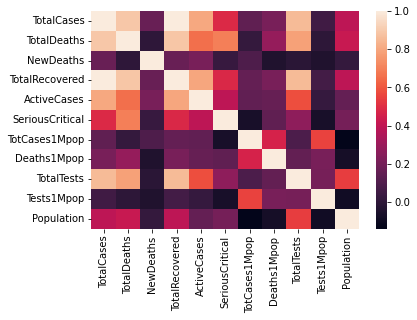

In [41]:
corr = data.corr()
sns.heatmap(corr)

### Por medio de un mapa de calor, se visualiza de mejor manera la relacion de las variablres obtenidas 

<AxesSubplot:>

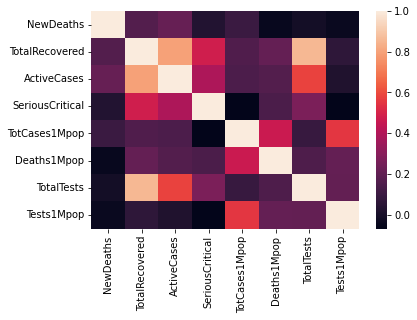

In [42]:
filtered_data = data[['NewDeaths',
       'TotalRecovered', 'ActiveCases', 'SeriousCritical',
       'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',
       'Tests1Mpop']]

corr = filtered_data.corr()
sns.heatmap(corr)

## Resumen Ejecutivo
Con la realización de este trabajo se pude realizar análisis con respecto 
al comportamiento del COVID en distintas locaciones del mundo y lograr 
comprender como se relacionan las distintas variables que conforman al
Dataset, lo cual nos permite tener una mejor noción de cómo la población 
mundial se vio afectada por el COVID: 
- Nuevas muertes
- Total de recuperados
- Casos que se presentaban activos en el momento
- Pacientes críticos
- Muertes de pacientes
- Conteo total de pacientes
- Pruebas realizadas.

A través de la minería de datos y la estandarización de datos sea logrado 
tener un dataset más limpio y organizado, pudiendo permitir el manejo de
los distintos datos para distintas opciones, ya sea desde predicciones a futuro,
análisis del comportamiento de la población, efectividad de medidas sanitarias, etc.
